# Flush memory

In [2]:
from tensorflow.keras import backend as K
K.clear_session()

In [3]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices())
# print(tf.config.list_logical_devices())

True
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

In [5]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices())
print(tf.config.list_logical_devices())

True
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:CPU:0', device_type='CPU')]


# Imports and Setup

In [7]:
import numpy as np 
import pandas as pd 
import os

dataset = r"D:\Code\ML_Project\dataset"
for dirpath, dirname, filenames in os.walk(dataset):
    print("Dir name:", dirname)
    for filename in filenames:
        print(os.path.join(dirpath, filename))

Dir name: ['Training and Testing Sets']
D:\Code\ML_Project\dataset\NUSW-NB15_features.csv
D:\Code\ML_Project\dataset\NUSW-NB15_GT.csv
D:\Code\ML_Project\dataset\The UNSW-NB15 description.pdf
D:\Code\ML_Project\dataset\UNSW-NB15_1.csv
D:\Code\ML_Project\dataset\UNSW-NB15_2.csv
D:\Code\ML_Project\dataset\UNSW-NB15_3.csv
D:\Code\ML_Project\dataset\UNSW-NB15_4.csv
D:\Code\ML_Project\dataset\UNSW-NB15_LIST_EVENTS.csv
Dir name: []
D:\Code\ML_Project\dataset\Training and Testing Sets\UNSW_NB15_testing-set.csv
D:\Code\ML_Project\dataset\Training and Testing Sets\UNSW_NB15_testing-set.parquet
D:\Code\ML_Project\dataset\Training and Testing Sets\UNSW_NB15_training-set.csv
D:\Code\ML_Project\dataset\Training and Testing Sets\UNSW_NB15_training-set.parquet


# Load dataset

In [9]:
import pandas as pd

# Load the datasets with different encoding for the problematic file
train_df = pd.read_csv(r"D:\Code\ML_Project\dataset\Training and Testing Sets\UNSW_NB15_training-set.csv")
test_df = pd.read_csv(r"D:\Code\ML_Project\dataset\Training and Testing Sets\UNSW_NB15_testing-set.csv")
event_df = pd.read_csv(r"D:\Code\ML_Project\dataset\UNSW-NB15_LIST_EVENTS.csv")


features_df = pd.read_csv(r"D:\Code\ML_Project\dataset\NUSW-NB15_features.csv", encoding='ISO-8859-1')

# Feature Details

In [11]:
features_df

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [12]:
train_df 

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


# Test Data Set

In [14]:
test_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


# Basic Data preprocesssing

## Dataset columns

In [17]:
# Identify the data types of columns
column_data_types = train_df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 41 Numerical Columns in dataset
There are 4 Categorical Columns in dataset


## Find duplicate records


In [19]:
print("Duplicates in train_df: ", train_df.duplicated().sum())
print("Duplicates in train_df: ", test_df.duplicated().sum())
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

Duplicates in train_df:  0
Duplicates in train_df:  0


## Find missing values

In [21]:
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values" })
missing_data

,Total No. of Missing Values
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [22]:
missing_data = test_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values" })
missing_data

,Total No. of Missing Values
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


## Handling ct_ftp_cmd

In [24]:
def ct_ftp_cmf_handle(df):
    # Convert to string explicitly
    df.loc[:, 'ct_ftp_cmd'] = df['ct_ftp_cmd'].astype(str)
    
    # Replace spaces or empty strings with '0' safely
    df.loc[:, 'ct_ftp_cmd'] = df['ct_ftp_cmd'].str.strip().replace('', '0')
    
    # Convert back to integer (ensuring everything is a valid number)
    df.loc[:, 'ct_ftp_cmd'] = df['ct_ftp_cmd'].astype(int)

ct_ftp_cmf_handle(train_df)
ct_ftp_cmf_handle(test_df)

C:\Users\Chetanya Jolly\AppData\Local\Temp\ipykernel_35720\155591056.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '0']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'ct_ftp_cmd'] = df['ct_ftp_cmd'].astype(str)
C:\Users\Chetanya Jolly\AppData\Local\Temp\ipykernel_35720\155591056.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '0']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'ct_ftp_cmd'] = df['ct_ftp_cmd'].astype(str)


## Handling is_ftp_login

In [26]:
def convert_to_binary(df, column):
    df.loc[:, column] = (df[column] > 0).astype(int)
    return df

# Define the column name
column = 'is_ftp_login'

# Call the function
train_df = convert_to_binary(train_df, column)
test_df= convert_to_binary(test_df, column)

# EDA

## Check Outliers

In [29]:
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)

40

In [30]:
train_df = train_df.fillna(0)  # Replace NaNs with 0
test_df = test_df.fillna(0)  # Replace NaNs with 0

C:\Users\Chetanya Jolly\AppData\Local\Temp\ipykernel_35720\3827687630.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df = train_df.fillna(0)  # Replace NaNs with 0
C:\Users\Chetanya Jolly\AppData\Local\Temp\ipykernel_35720\3827687630.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df = test_df.fillna(0)  # Replace NaNs with 0


In [31]:
train_df.columns == test_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [32]:
# Drop the specified columns from both train_df and test_df
columns_to_drop = ['proto','state', 'service']
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [33]:
#Checking the categorical columns 
cat_train_columns = train_df.select_dtypes(include=['O']).columns.tolist()
cat_test_columns = test_df.select_dtypes(include=['O']).columns.tolist()
print(cat_train_columns, cat_test_columns) 

['attack_cat'] ['attack_cat']


## Target feature Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
ohe = OneHotEncoder()
train_df['attack_cat'] = label_encoder.fit_transform(train_df['attack_cat'])
test_df['attack_cat'] = label_encoder.fit_transform(test_df['attack_cat'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'Analysis': 0, 'Backdoor': 1, 'DoS': 2, 'Exploits': 3, 'Fuzzers': 4, 'Generic': 5, 'Normal': 6, 'Reconnaissance': 7, 'Shellcode': 8, 'Worms': 9}


## Checking Highly Correlated Features

<Axes: title={'center': 'Correlation Plot'}>

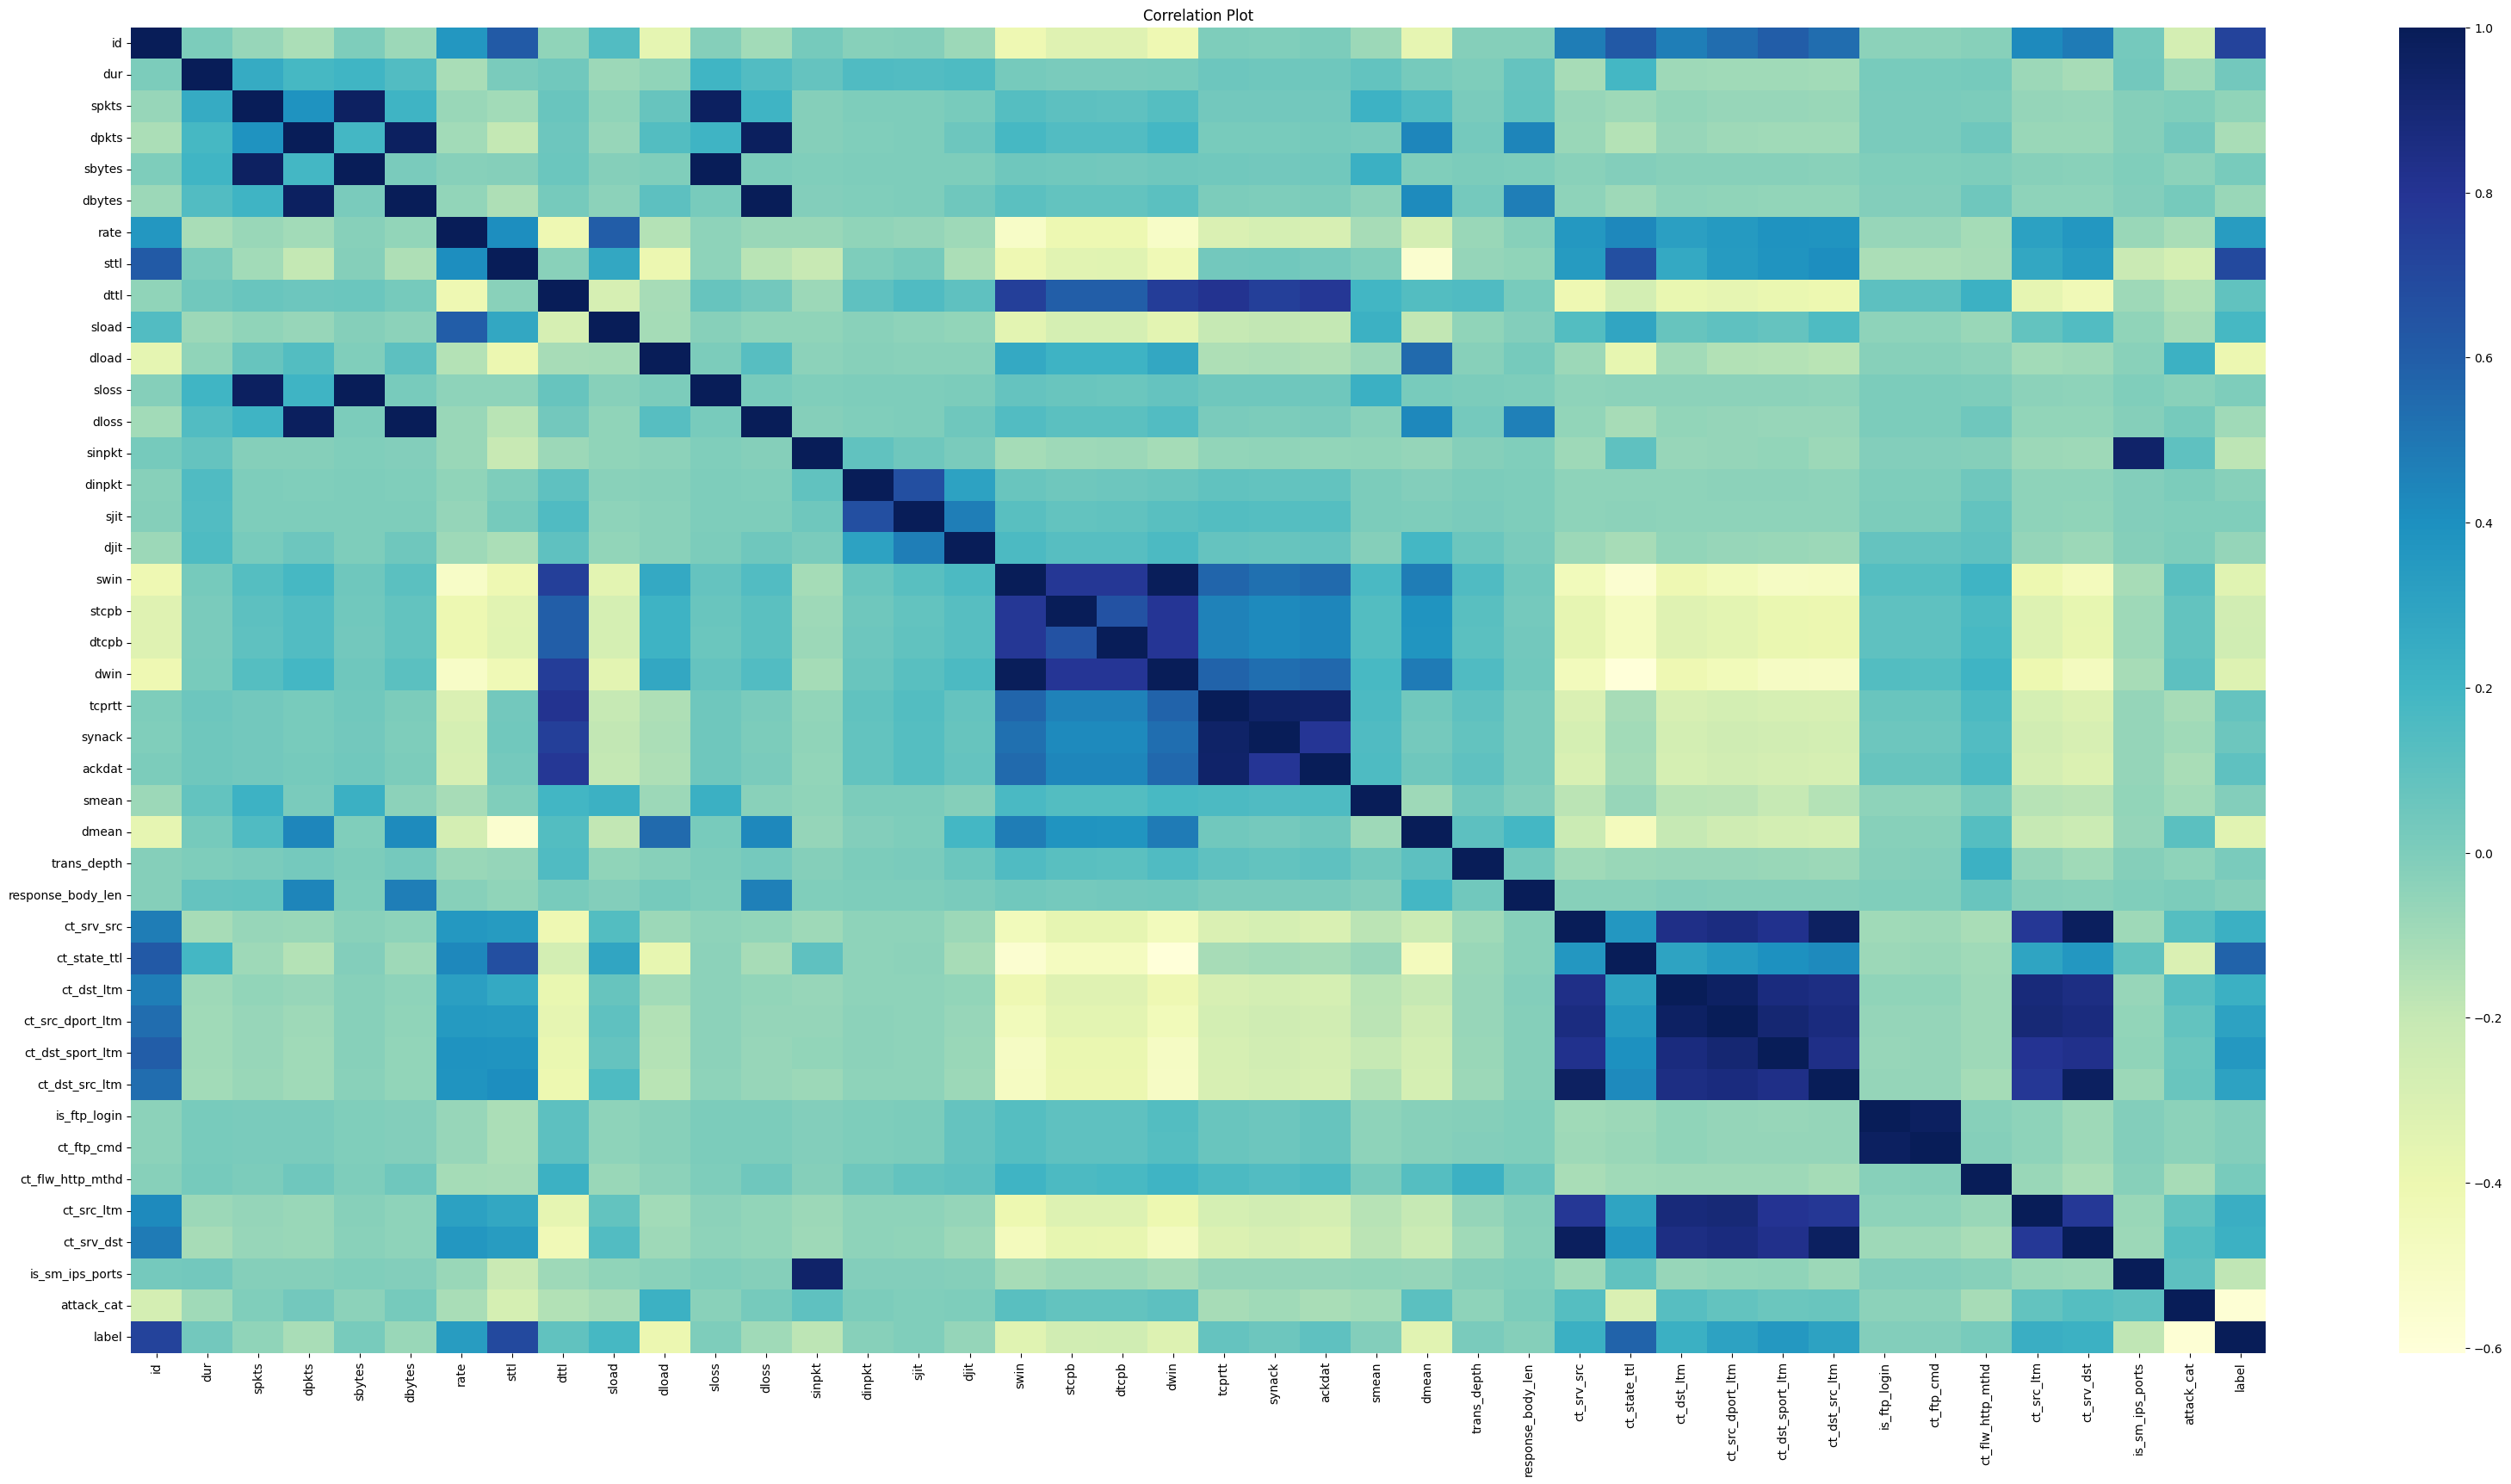

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(train_df.corr(),cmap='YlGnBu')

In [38]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
spkts and sbytes
spkts and sloss
dpkts and dbytes
dpkts and dloss
sbytes and sloss
dbytes and dloss
dttl and dwin
dttl and tcprtt
dttl and ackdat
sinpkt and is_sm_ips_ports
swin and stcpb
swin and dtcpb
swin and dwin
stcpb and dwin
dtcpb and dwin
tcprtt and synack
tcprtt and ackdat
synack and ackdat
ct_srv_src and ct_dst_ltm
ct_srv_src and ct_src_dport_ltm
ct_srv_src and ct_dst_sport_ltm
ct_srv_src and ct_dst_src_ltm
ct_srv_src and ct_src_ltm
ct_srv_src and ct_srv_dst
ct_dst_ltm and ct_src_dport_ltm
ct_dst_ltm and ct_dst_sport_ltm
ct_dst_ltm and ct_dst_src_ltm
ct_dst_ltm and ct_src_ltm
ct_dst_ltm and ct_srv_dst
ct_src_dport_ltm and ct_dst_sport_ltm
ct_src_dport_ltm and ct_dst_src_ltm
ct_src_dport_ltm and ct_src_ltm
ct_src_dport_ltm and ct_srv_dst
ct_dst_sport_ltm and ct_dst_src_ltm
ct_dst_sport_ltm and ct_src_ltm
ct_dst_sport_ltm and ct_srv_dst
ct_dst_src_ltm and ct_src_ltm
ct_dst_src_ltm and ct_srv_dst
is_ftp_login and ct_ftp_cmd
ct_src_ltm and ct_srv_dst


## Drop highly corelated features

In [40]:
# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

# Drop the features from the DataFrame
train_df = train_df.drop(columns=features_to_drop)
test_df = test_df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(train_df.columns)
print(test_df.columns)
train_df.columns == test_df.columns

Remaining features after dropping highly correlated ones:
Index(['id', 'dur', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'synack', 'smean', 'dmean',
       'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl',
       'is_ftp_login', 'ct_flw_http_mthd', 'attack_cat', 'label'],
      dtype='object')
Index(['id', 'dur', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'synack', 'smean', 'dmean',
       'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl',
       'is_ftp_login', 'ct_flw_http_mthd', 'attack_cat', 'label'],
      dtype='object')


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

# PCA

Explained Variance Ratio: [0.20409952 0.11273539 0.07759305 0.07234954 0.05489174 0.05280845
 0.04666779 0.04295555 0.03996572 0.03726929 0.03293973 0.03068283
 0.02939614 0.0279763  0.0262282  0.01869644 0.01612959 0.01498441
 0.01190033 0.01155797 0.01074071 0.01062235 0.0074439  0.00570644
 0.00365862]


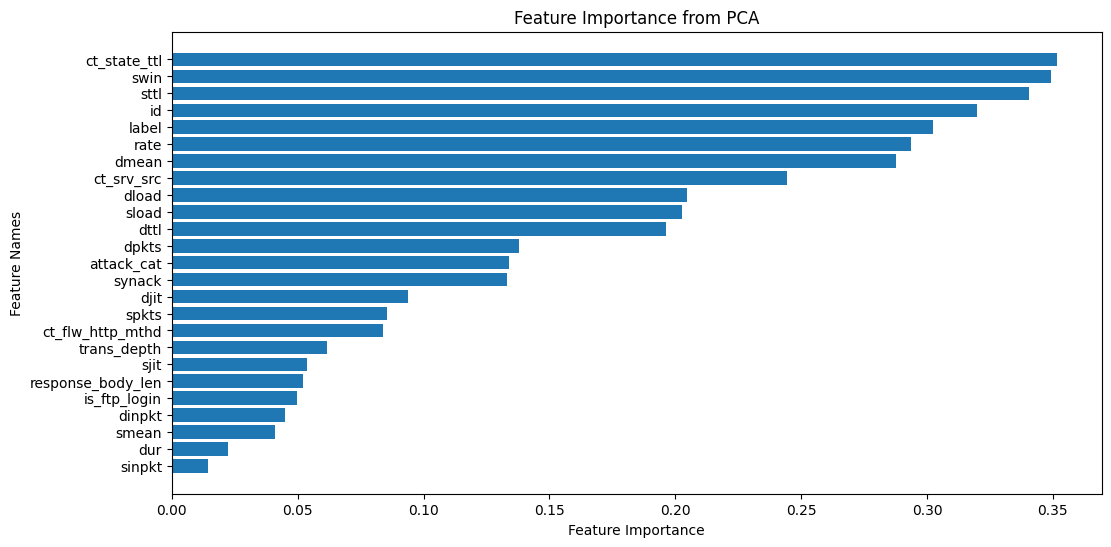

In [42]:
import numpy as np1
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the dataset (PCA is sensitive to scale)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_df.select_dtypes(include=[np.number]))  # Only numerical columns

# Apply PCA
pca = PCA(n_components=len(train_df.select_dtypes(include=[np.number]).columns))  # Keep all components
pca.fit(scaled_data)

# Explained variance ratio (How much each principal component explains)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Feature importance (absolute values of PCA components)
feature_importance = np.abs(pca.components_[0])  # First principal component

# Create a DataFrame to show feature importance
feature_names = train_df.select_dtypes(include=[np.number]).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance from PCA")
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()


In [43]:
num_rows = train_df.shape[0]  # Number of rows
print("Total Rows:", num_rows)


Total Rows: 175341


# Target Class before Augmentation

attack_cat
6    56000
5    40000
3    33393
4    18184
2    12264
7    10491
0     2000
1     1746
8     1133
9      130
Name: count, dtype: int64


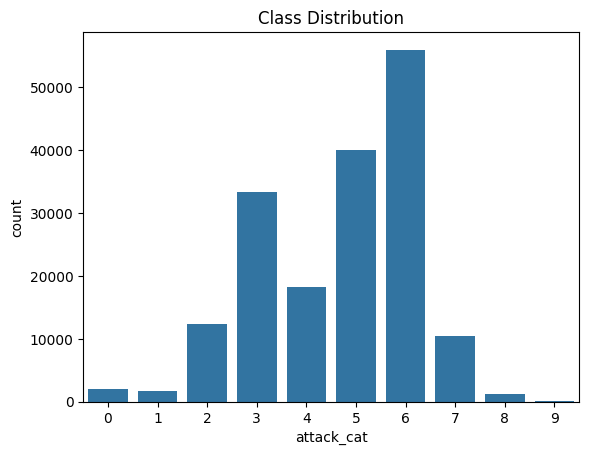

In [45]:
print(train_df['attack_cat'].value_counts()) 
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=train_df['attack_cat'])
plt.title("Class Distribution")
plt.show()

attack_cat
6    37000
5    18871
3    11132
4     6062
2     4089
7     3496
0      677
1      583
8      378
9       44
Name: count, dtype: int64


<Axes: xlabel='attack_cat', ylabel='count'>

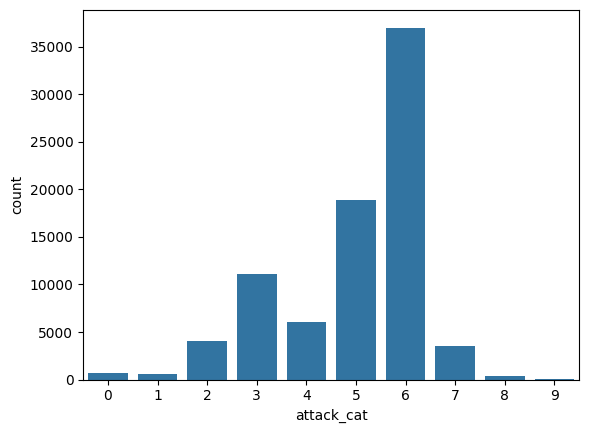

In [46]:
print(test_df['attack_cat'].value_counts())
sns.countplot(x = test_df['attack_cat'])

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   rate               175341 non-null  float64
 5   sttl               175341 non-null  int64  
 6   dttl               175341 non-null  int64  
 7   sload              175341 non-null  float64
 8   dload              175341 non-null  float64
 9   sinpkt             175341 non-null  float64
 10  dinpkt             175341 non-null  float64
 11  sjit               175341 non-null  float64
 12  djit               175341 non-null  float64
 13  swin               175341 non-null  int64  
 14  synack             175341 non-null  float64
 15  smean              175341 non-null  int64  
 16  dm

In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   spkts              82332 non-null  int64  
 3   dpkts              82332 non-null  int64  
 4   rate               82332 non-null  float64
 5   sttl               82332 non-null  int64  
 6   dttl               82332 non-null  int64  
 7   sload              82332 non-null  float64
 8   dload              82332 non-null  float64
 9   sinpkt             82332 non-null  float64
 10  dinpkt             82332 non-null  float64
 11  sjit               82332 non-null  float64
 12  djit               82332 non-null  float64
 13  swin               82332 non-null  int64  
 14  synack             82332 non-null  float64
 15  smean              82332 non-null  int64  
 16  dmean              823

# Data Augmentation using SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd


X = train_df.drop(columns=['attack_cat'])  
y = train_df['attack_cat']  



# Define the desired number of samples for each class (20,000 for each class)
desired_count = 20000



# Define the oversampling strategy for SMOTE
oversample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] < desired_count}

# Define the undersampling strategy for RandomUnderSampler
undersample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] > desired_count}

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=oversample_strategy)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Combine SMOTE and RandomUnderSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Apply the pipeline to resample the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Print class distribution before and after resampling
print("\nBefore resampling:", y.value_counts())
print("\nAfter resampling:", y_resampled.value_counts())



Before resampling: attack_cat
6    56000
5    40000
3    33393
4    18184
2    12264
7    10491
0     2000
1     1746
8     1133
9      130
Name: count, dtype: int64

After resampling: attack_cat
0    20000
1    20000
2    20000
3    20000
4    20000
5    20000
6    20000
7    20000
8    20000
9    20000
Name: count, dtype: int64


In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   rate               175341 non-null  float64
 5   sttl               175341 non-null  int64  
 6   dttl               175341 non-null  int64  
 7   sload              175341 non-null  float64
 8   dload              175341 non-null  float64
 9   sinpkt             175341 non-null  float64
 10  dinpkt             175341 non-null  float64
 11  sjit               175341 non-null  float64
 12  djit               175341 non-null  float64
 13  swin               175341 non-null  int64  
 14  synack             175341 non-null  float64
 15  smean              175341 non-null  int64  
 16  dm

# train-test-split

In [53]:
X_train = X_resampled
y_train = y_resampled
X_test = test_df.drop(columns='attack_cat')
y_test = test_df['attack_cat']

print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)

Training Features Shape: (200000, 24)
Test Features Shape: (82332, 24)
Training Labels Shape: (200000,)
Test Labels Shape: (82332,)


# Model Building

## CNN

### Build and Train 

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling1D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Feature scaling (CNNs perform better with normalized input)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data to fit CNN input format (samples, features, channels)
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)  # Shape: (num_samples, num_features, 1)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(
    X_train_cnn, 
    y_train, 
    test_size = 0.2, 
    stratify = y_train, 
    random_state = 42,
)

# Define CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(64, activation='relu'),
    Dropout(0.3),
    
    Dense(len(np.unique(y_train)), activation='softmax')  # Multi-class classification
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 64)            256       
                                                                 
 batch_normalization (BatchN  (None, 22, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 128)            24704     
                                                                 
 batch_normalization_1 (Batc  (None, 9, 128)           512       
 hNormalization)                                                 
                                                        

In [58]:
# Train the CNN model
history = model.fit(
    X_train_cnn, 
    y_train_cnn, 
    epochs=20, 
    batch_size=64, 
    validation_data=(X_val_cnn, y_val_cnn), 
    verbose=1
)

Epoch 1/20
2500/2500 [==============================] - 24s 9ms/step - loss: 1.1964 - accuracy: 0.5623 - val_loss: 0.9198 - val_accuracy: 0.6394
Epoch 2/20
2500/2500 [==============================] - 23s 9ms/step - loss: 0.9886 - accuracy: 0.6321 - val_loss: 0.8814 - val_accuracy: 0.6510
Epoch 3/20
2500/2500 [==============================] - 23s 9ms/step - loss: 0.9358 - accuracy: 0.6487 - val_loss: 0.8905 - val_accuracy: 0.6587
Epoch 4/20
2500/2500 [==============================] - 24s 9ms/step - loss: 0.9045 - accuracy: 0.6601 - val_loss: 0.8404 - val_accuracy: 0.6757
Epoch 5/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.8871 - accuracy: 0.6666 - val_loss: 0.8071 - val_accuracy: 0.6868
Epoch 6/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.8712 - accuracy: 0.6696 - val_loss: 0.8101 - val_accuracy: 0.6881
Epoch 7/20
2500/2500 [==============================] - 24s 10ms/step - loss: 0.8598 - accuracy: 0.6725 - val_loss: 0.7850 - val

In [59]:
# Save the model
model.save('cnn_model_changed.h5')

### Test and Plot

In [61]:
from tensorflow import keras

model = keras.models.load_model('cnn_model_changed.h5')

2573/2573 [==============================] - 6s 2ms/step - loss: 97.8864 - accuracy: 0.3706  
Test Accuracy: 37.06%
Test Loss: 97.8864
2573/2573 [==============================] - 5s 2ms/step


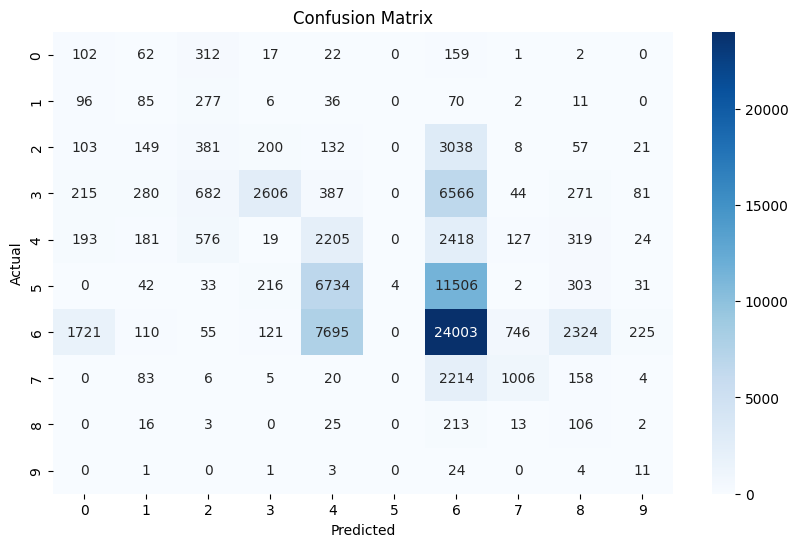

              precision    recall  f1-score   support

           0       0.04      0.15      0.07       677
           1       0.08      0.15      0.11       583
           2       0.16      0.09      0.12      4089
           3       0.82      0.23      0.36     11132
           4       0.13      0.36      0.19      6062
           5       1.00      0.00      0.00     18871
           6       0.48      0.65      0.55     37000
           7       0.52      0.29      0.37      3496
           8       0.03      0.28      0.05       378
           9       0.03      0.25      0.05        44

    accuracy                           0.37     82332
   macro avg       0.33      0.25      0.19     82332
weighted avg       0.60      0.37      0.33     82332



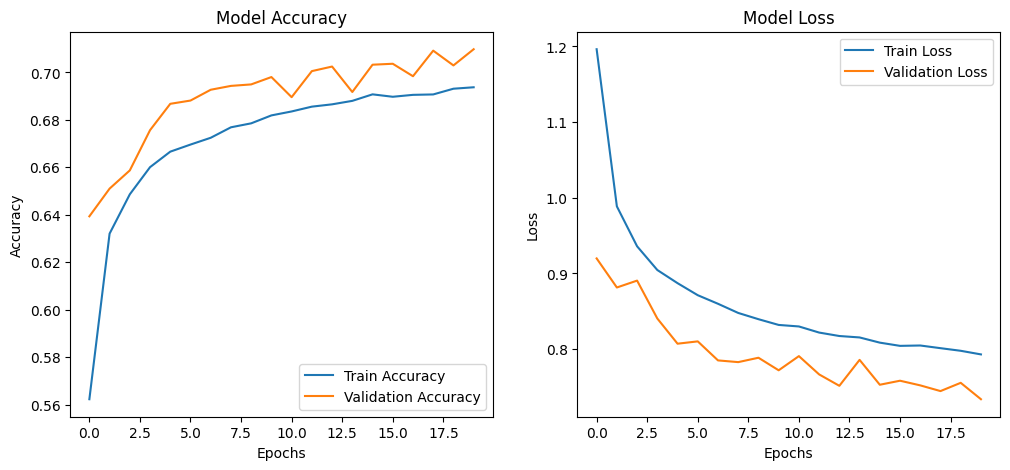

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_cnn, y_test, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


# Get model predictions
y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred_classes))
# Plot training accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

## Bi-LSTM

### Build and Train

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM, BatchNormalization
from tensorflow.keras import mixed_precision
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Enable mixed precision for faster training on RTX 4050
mixed_precision.set_global_policy("mixed_float16")

# --------------------------- Feature Scaling ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------- Reshape Data for BiLSTM ---------------------------
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, -1)  # Shape: (samples, time_steps=1, features)
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, -1)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_lstm, 
    y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42,
)

# Ensure y_train and y_test are NumPy arrays
y_train_lstm = np.array(y_train_lstm)
y_val_lstm = np.array(y_val_lstm)
y_test_lstm = np.array(y_test)

# --------------------------- Define Optimized BiLSTM Model ---------------------------
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', input_shape=(1, 24))),
    BatchNormalization(),
    Dropout(0.3),
    
    Bidirectional(LSTM(64, activation='tanh', recurrent_activation='sigmoid')),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(64, activation='relu'),
    Dropout(0.3),
    
    Dense(len(np.unique(y_train)), activation='softmax', dtype='float32')  # Ensure float32 output
])

# --------------------------- Build and Compile Model ---------------------------
model.build(input_shape=(None, 1, 24))  # Force model to build
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# --------------------------- Train BiLSTM Model ---------------------------
history = model.fit(
    X_train_lstm, 
    y_train_lstm, 
    validation_data=(
        X_val_lstm, 
        y_val_lstm
    ),
    epochs=20, 
    batch_size=64,
)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4050 Laptop GPU, compute capability 8.9
Epoch 1/20
2500/2500 [==============================] - 630s 249ms/step - loss: 1.2005 - accuracy: 0.5520 - val_loss: 0.9120 - val_accuracy: 0.6469
Epoch 2/20
2500/2500 [==============================] - 615s 246ms/step - loss: 0.9631 - accuracy: 0.6366 - val_loss: 0.8312 - val_accuracy: 0.6700
Epoch 3/20
2500/2500 [==============================] - 616s 246ms/step - loss: 0.9071 - accuracy: 0.6539 - val_loss: 0.8122 - val_accuracy: 0.6801
Epoch 4/20
2500/2500 [==============================] - 616s 247ms/step - loss: 0.8809 - accuracy: 0.6633 - val_loss: 0.7898 - val_accuracy: 0.6831
Epoch 5/20
2500/2500 [==============================] - 621s 249ms/step - loss: 0.8643 - accuracy: 0.6683 - val_loss: 0.7758 - val_accuracy: 0.6921
Epoch 6/

### Test and Plot

2573/2573 [==============================] - 124s 47ms/step - loss: 2.8635 - accuracy: 0.5958  
 Test Accuracy: 59.58%
 Test Loss: 2.8635
2573/2573 [==============================] - 120s 46ms/step
 Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.21      0.15       677
           1       0.02      0.25      0.04       583
           2       0.19      0.09      0.12      4089
           3       0.87      0.47      0.61     11132
           4       0.17      0.72      0.28      6062
           5       0.00      0.00      0.00     18871
           6       1.00      1.00      1.00     37000
           7       0.81      0.47      0.59      3496
           8       0.13      0.42      0.19       378
           9       0.07      0.45      0.13        44

    accuracy                           0.60     82332
   macro avg       0.34      0.41      0.31     82332
weighted avg       0.62      0.60      0.59     82332



D:\anaconda3\envs\unsw_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\envs\unsw_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\envs\unsw_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


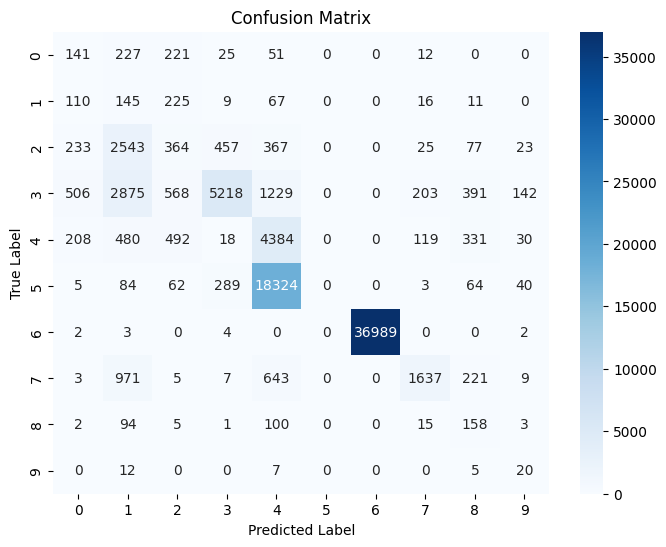

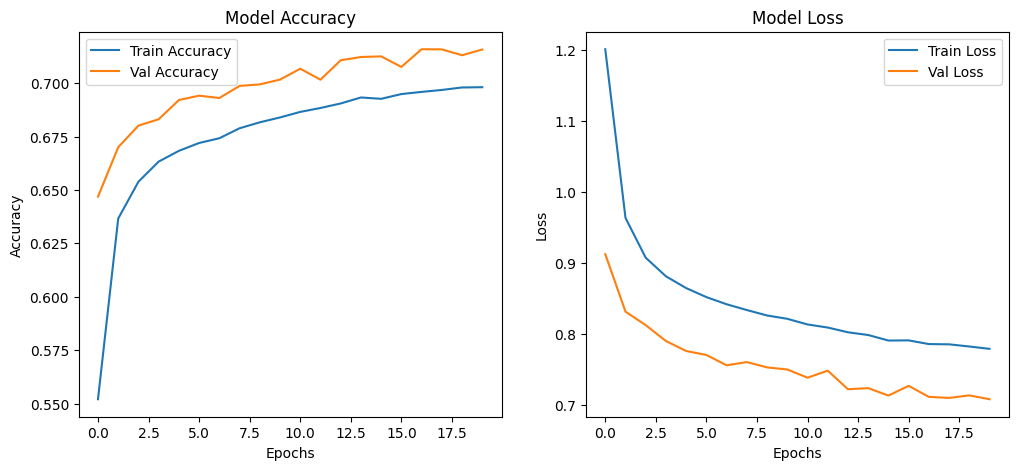

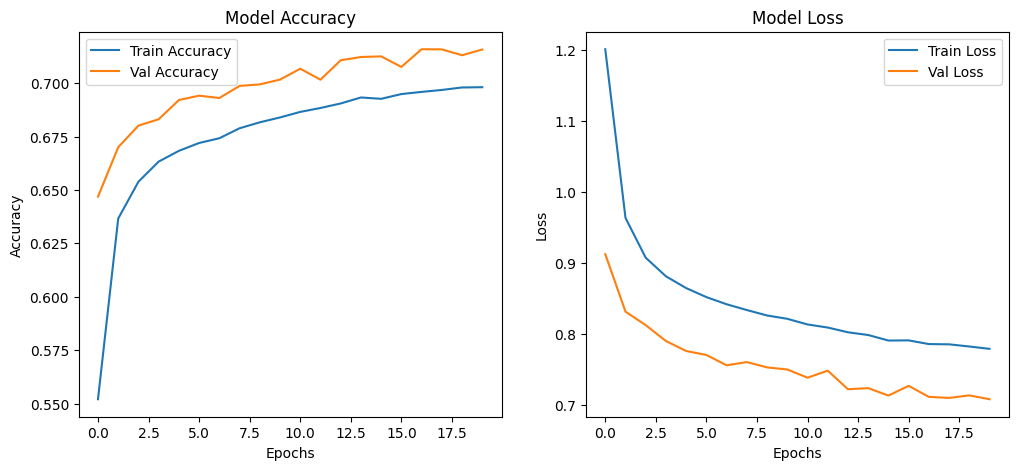

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test_lstm)

print(f" Test Accuracy: {test_accuracy * 100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

model.save('bi-lstm_model_changed.h5')


# Get predictions
y_pred_probs = model.predict(X_test_lstm)  # Get probability scores
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

from sklearn.metrics import classification_report

# Print classification report
print(" Classification Report:")
print(classification_report(y_test_lstm, y_pred))



# Compute confusion matrix
cm = confusion_matrix(y_test_lstm, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot training & validation loss and accuracy
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


# Plot training & validation loss and accuracy
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


## RNN

### Build and Train

Epoch 1/20
2500/2500 [==============================] - 570s 227ms/step - loss: 1.2870 - accuracy: 0.5174 - val_loss: 1.0802 - val_accuracy: 0.5837
Epoch 2/20
2500/2500 [==============================] - 570s 228ms/step - loss: 1.0614 - accuracy: 0.6005 - val_loss: 0.9342 - val_accuracy: 0.6312
Epoch 3/20
2500/2500 [==============================] - 571s 229ms/step - loss: 1.0013 - accuracy: 0.6221 - val_loss: 0.8953 - val_accuracy: 0.6494
Epoch 4/20
2500/2500 [==============================] - 571s 228ms/step - loss: 0.9670 - accuracy: 0.6334 - val_loss: 0.8843 - val_accuracy: 0.6453
Epoch 5/20
2500/2500 [==============================] - 581s 232ms/step - loss: 0.9514 - accuracy: 0.6367 - val_loss: 0.9020 - val_accuracy: 0.6507
Epoch 6/20
2500/2500 [==============================] - 576s 230ms/step - loss: 0.9338 - accuracy: 0.6421 - val_loss: 0.8611 - val_accuracy: 0.6645
Epoch 7/20
2500/2500 [==============================] - 579s 232ms/step - loss: 0.9236 - accuracy: 0.6455 - val_

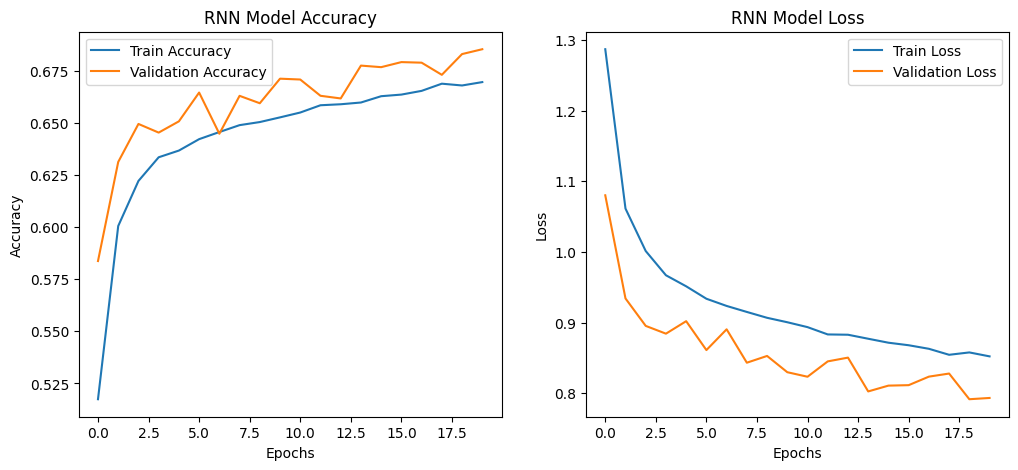

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras import mixed_precision
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------ Enable Mixed Precision ------------------------------ #
mixed_precision.set_global_policy("mixed_float16")

# ------------------------------ Feature Scaling ------------------------------ #
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------ Reshape Data for RNN ------------------------------ #
# Assuming your input has 24 features -> 8 time steps × 3 features per step
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 8, 3)
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 8, 3)

# ------------------------------ Create Validation Split ------------------------------ #
X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(
    X_train_rnn,
    y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)

# Convert labels to NumPy arrays
y_train_rnn = np.array(y_train_rnn)
y_val_rnn = np.array(y_val_rnn)
y_test_rnn = np.array(y_test)

# ------------------------------ Define RNN Model ------------------------------ #
model = Sequential([
    SimpleRNN(128, return_sequences=True, activation='tanh', input_shape=(8, 3)),
    BatchNormalization(),
    Dropout(0.3),

    SimpleRNN(64, activation='tanh'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(len(np.unique(y_train)), activation='softmax', dtype='float32')  # Output dtype for mixed precision
])

# ------------------------------ Compile Model ------------------------------ #
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------ Train Model ------------------------------ #
history = model.fit(
    X_train_rnn,
    y_train_rnn,
    validation_data=(X_val_rnn, y_val_rnn),
    epochs=20,           # Increased for better learning
    batch_size=64,
    verbose=1
)

# ------------------------------ Evaluate on Test Set ------------------------------ #
test_loss, test_acc = model.evaluate(X_test_rnn, y_test_rnn, verbose=1)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# ------------------------------ Plot Training Curves ------------------------------ #
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('RNN Model Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RNN Model Loss')
plt.legend()

plt.show()


### Test and Plot

2573/2573 [==============================] - 188s 73ms/step - loss: 0.9884 - accuracy: 0.6828
 Test Accuracy: 68.28%
 Test Loss: 0.9884
2573/2573 [==============================] - 188s 73ms/step
 Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.07      0.07       677
           1       0.06      0.82      0.11       583
           2       0.35      0.05      0.08      4089
           3       0.85      0.50      0.63     11132
           4       0.31      0.69      0.43      6062
           5       1.00      0.32      0.48     18871
           6       1.00      1.00      1.00     37000
           7       0.35      0.68      0.46      3496
           8       0.14      0.68      0.23       378
           9       0.04      0.77      0.07        44

    accuracy                           0.68     82332
   macro avg       0.42      0.56      0.36     82332
weighted avg       0.85      0.68      0.70     82332



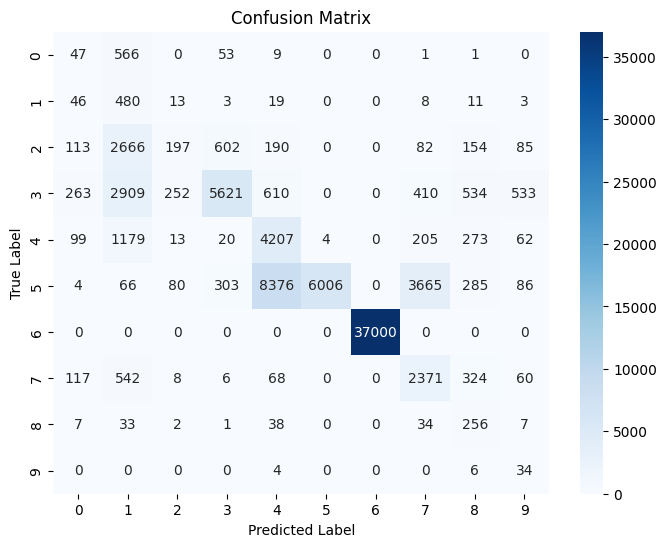

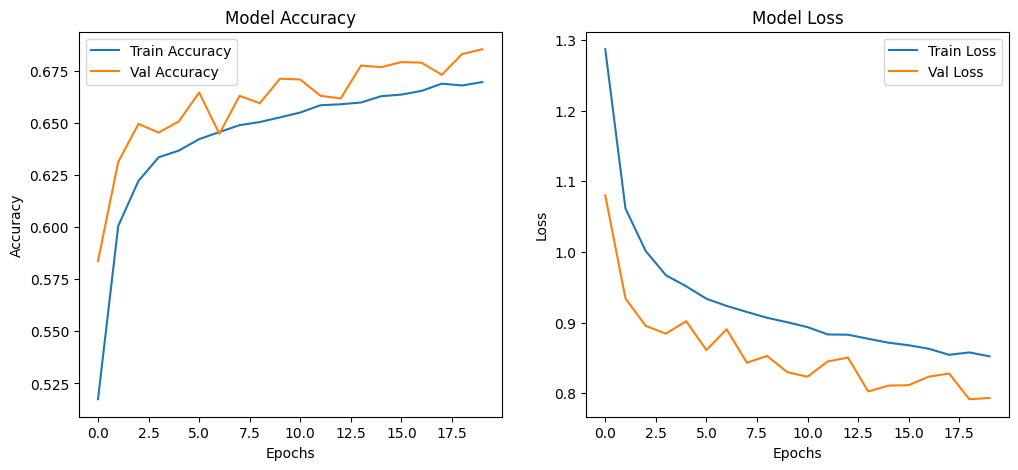

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# -------------------- Evaluate the RNN Model --------------------

# Remember to use your reshaped test data
test_loss, test_accuracy = model.evaluate(X_test_rnn, y_test_rnn)

print(f" Test Accuracy: {test_accuracy * 100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# Save the RNN model
model.save('simple-rnn_model_changed.h5')

# -------------------- Predictions --------------------

# Get predicted probabilities
y_pred_probs = model.predict(X_test_rnn)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# -------------------- Classification Report --------------------

print(" Classification Report:")
print(classification_report(y_test, y_pred))

# -------------------- Confusion Matrix --------------------

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# -------------------- Plot Accuracy & Loss --------------------

plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()